In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ion_sim import IonSim, plot, init
from pint import UnitRegistry
from math import pi as π

u = UnitRegistry()
u.setup_matplotlib()

In [2]:
m = u('40 amu')
ωx = 2*π * u('1 MHz')
ωy = 2*π * u('10 MHz')
ωz = 2*π * u('10 MHz')
ξ = ((u.e**2 / (4*π*u.ε_0 * m * ωx**2))**(1/3)).to_base_units()

class example(IonSim):
    def U(self, x, y, z, t):
        m = self.m
        Ux = (1/2) * m * ωx**2 * x**2
        Uy = (1/2) * m * ωy**2 * y**2
        Uz = (1/2) * m * ωz**2 * z**2
        return (Ux + Uy + Uz).to_base_units().m

In [3]:
# takes about 2 seconds to run
ex = example(u)
print(f'{"N":<4} {"Scaled equilibrium positions":^100}')
for N in range(2,11):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=ξ)
    positions = np.around(np.sort((ex.equilibrium_position() / ξ).to('dimensionless').m[0,:]), 4)
    pos_str = ('{:^10}'*N).format(*positions)
    print(f'{N:<4} {pos_str:^100}')

N                                        Scaled equilibrium positions                                    
2                                              -0.63      0.63                                           
3                                        -1.0772     0.0      1.0772                                     
4                                   -1.4368   -0.4544    0.4544    1.4368                                
5                              -1.7429   -0.8221     -0.0     0.8221    1.7429                           
6                         -2.0123   -1.1361   -0.3699    0.3699    1.1361    2.0123                      
7                    -2.2545   -1.4129   -0.6869     -0.0     0.6869    1.4129    2.2545                 
8               -2.4758   -1.6621    -0.967    -0.318    0.318     0.967     1.6621    2.4758            
9          -2.6803   -1.8897   -1.2195   -0.5996     -0.0     0.5996    1.2195    1.8897    2.6803       
10    -2.8708   -2.1001   -1.4503   -0.8538   

Table 1. Scaled equilibrium position of the trapped ions for different total number of ions (D.F.V. James 1997)
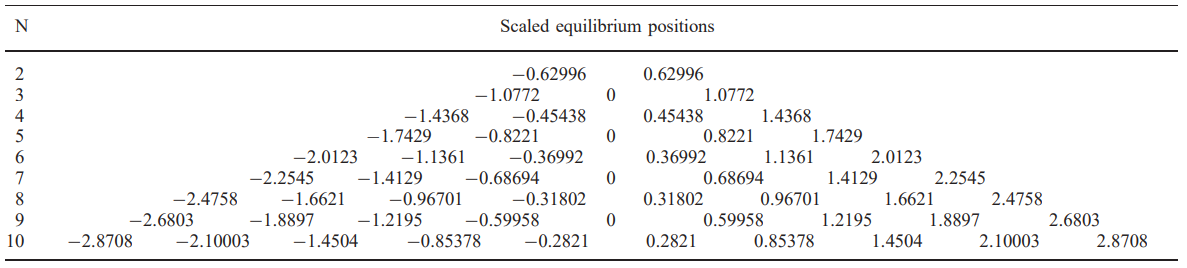

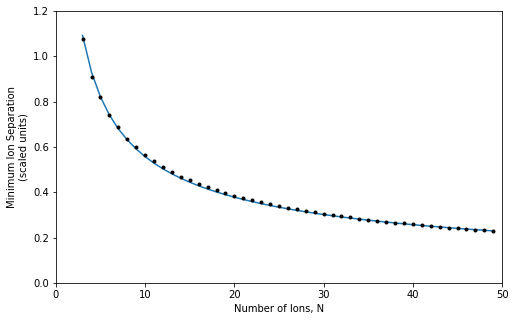

In [4]:
ex = example(u)
def minimum_separation(N):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=ξ)
    return np.min(np.diff(np.sort((ex.equilibrium_position() / ξ).to('dimensionless').m[0,:])))

N = np.arange(3,50)
y = [minimum_separation(n) for n in N] # takes about 75 seconds to run
u_min = 2.018/N**0.559

plt.figure(figsize=(8,5))
plt.plot(N,u_min)
plt.plot(N,y, 'k.')
plt.xlabel('Number of Ions, N')
plt.ylabel('Minimum Ion Separation\n(scaled units)')
plt.xlim(0,50)
plt.ylim(0,1.2);

Figure 2. The relationship between the number of trapped ions N and the minimum separation. (D.F.V. James 1997)
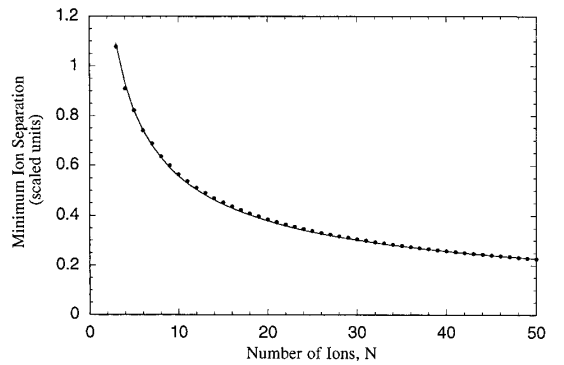

In [5]:
ex = example(u)
print(f'{"":<6}{"Eigenvalue":6}  {"Eigenvector"}')
for N in range(2,7):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=ξ)
    f, b = ex.normal_modes()
    μ = np.around(((2*π*f/ωx)**2).to('dimensionless').m,4)

    for i in range(N):
        print(f'{"N="+str(N) if i==0 else "":<6}{np.around(μ[i],3):=6}      {np.around(b[0,:,i],4)}')
    print('\n')

      Eigenvalue  Eigenvector
N=2      1.0      [0.7071 0.7071]
         3.0      [ 0.7071 -0.7071]


N=3      1.0      [0.5774 0.5774 0.5774]
         3.0      [ 0.7071  0.     -0.7071]
         5.8      [-0.4082  0.8165 -0.4082]


N=4      1.0      [0.5 0.5 0.5 0.5]
         3.0      [-0.6742 -0.2132  0.2132  0.6742]
        5.81      [ 0.5 -0.5 -0.5  0.5]
       9.308      [-0.2132  0.6742 -0.6742  0.2132]


N=5      1.0      [0.4472 0.4472 0.4472 0.4472 0.4472]
         3.0      [-0.6395 -0.3017  0.      0.3017  0.6395]
       5.818      [-0.5377  0.2805  0.5143  0.2805 -0.5377]
       9.332      [-0.3017  0.6395 -0.     -0.6395  0.3017]
      13.475      [ 0.1045 -0.4704  0.7318 -0.4704  0.1045]


N=6      1.0      [0.4082 0.4082 0.4082 0.4082 0.4082 0.4082]
         3.0      [-0.608  -0.3433 -0.1118  0.1118  0.3433  0.608 ]
       5.824      [ 0.5531 -0.1332 -0.4199 -0.4199 -0.1332  0.5531]
       9.352      [ 0.3577 -0.5431 -0.2778  0.2778  0.5431 -0.3577]
      13.514      [-0.

Table 2. Numerically determined eigenvalues and eigenvectors for 2 to 6 ions (D.F.V. James 1997)
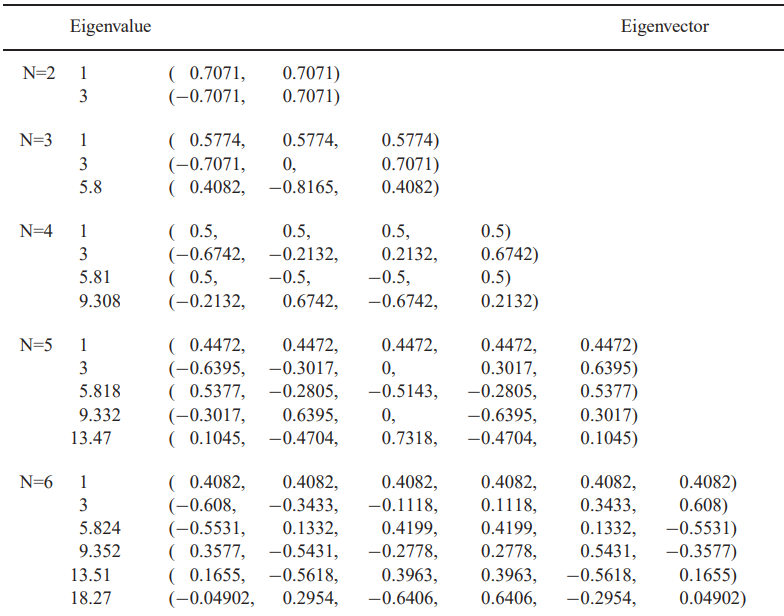

In [6]:
def mixed_species_example():
    ωx = (np.array([12.26, 3.72]) * 2*π * u('MHz')).to_base_units().m
    ωy = (np.array([11.19, 4.82]) * 2*π * u('MHz')).to_base_units().m
    ωz = (np.array([2.69, 1.65]) * 2*π * u('MHz')).to_base_units().m

    class mix_example(IonSim):
        def U(self, x, y, z, t):
            m = self.m.to_base_units().m
            Ux = (1/2) * m * (ωx)**2 * x**2
            Uy = (1/2) * m * (ωy)**2 * y**2
            Uz = (1/2) * m * (ωz)**2 * z**2
            return Ux + Uy + Uz

    mix = mix_example(u)
    mix.m = np.array([9.012, 23.985]) * u('1 amu')
    mix.x0 = init.gaussian(mix, sigma=np.array([1, 1, 1]) * u('1 um'))
    ν, e = mix.normal_modes()

    # scale eigenvectors by mass
    ep = np.around(np.moveaxis(np.moveaxis(e, (0,1,2), (1,2,0)) * np.sqrt(mix.m.m), (0,2,1), (0,1,2)).reshape(6,6),3)[::-1,:]
    # normalize eigenvectors
    ep = np.around(ep.T / np.sqrt(np.sum(ep**2,1)),3).T

    freq = np.around(ν.to('MHz').m[::-1],2)

    print(f'{" ":<8} {"9Be+ ion":^24}   {"25Mg+ ion":^24}')
    print(f'{"ωα/(2π)":<8} [{"ex1,α":>7} {"ey1,α":>7} {"ez1,α":>7}] [{"ex2,α":>7} {"ey2,α":>7} {"ez2,α":>7}]')
    for row in range(len(freq)):
        print(f'{freq[row]:<8} [{ep[row,0]:>7} {ep[row,1]:>7} {ep[row,2]:>7}] [{ep[row,3]:>7} {ep[row,4]:>7} {ep[row,5]:>7}]')

Normal mode eigenfrequencies and eigenvectors for a beryllium-magnesium ion
chain in a trap for which a single beryllium ion has secular frequencies of [ωx, ωy, ωz] =
2π × ([12.26, 11.19, 2.69] MHz), and magnesium has secular frequencies [ωx, ωy, ωz] = 2π ×
([3.72, 4.82, 1.65] MHz). (J.P. Home 2013)
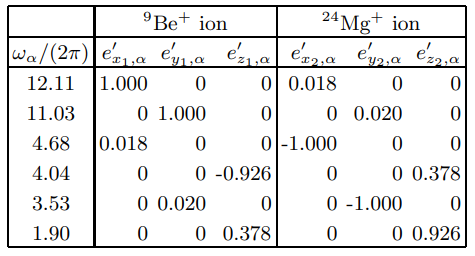